# Logistic regression metrics

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from log_metrics import *

** Datasets **

In [2]:
size =1000

coefficients = [0,-1.4,2.1,-3,10.4,-8]
x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    x[:,i]=np.random.rand(size)
y = np.vectorize(lambda x: round(1/(1+math.exp(-x))))((x*coefficients).sum(axis=1) + np.random.normal(size=size))

t_x = np.ones((size,len(coefficients)))
for i in range(1,len(coefficients)):
    t_x[:,i]=np.random.rand(size)
t_y = np.vectorize(lambda x: round(1/(1+math.exp(-x))))((t_x*coefficients).sum(axis=1) + np.random.normal(size=size))

** Regression **

In [3]:
from logistic_regressor import LogisticRegressor
log = LogisticRegressor()
log.fit(x,y,epochs=100,bin_size=1)
# predictions
pred = log.predict(t_x)
prob = log.predict(t_x,probability=True)

### Metrics

** Total accuracy **

In [4]:
accuracy(t_y,pred)

0.916

** Cross entropy loss **

In [5]:
cross_entropy_loss(t_y,prob).mean()

0.6336797747997936

**Receiver operating characteristic (ROC) curve**

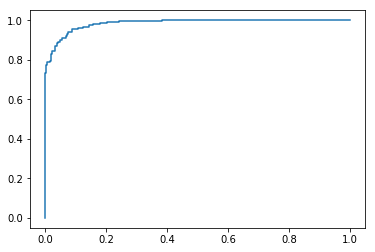

In [6]:
fpr,tpr,area = roc(t_y,prob,area=True)
plt.step(fpr,tpr)
plt.show()

Area under graph

In [7]:
print(area)

0.9834726451370245


**Confusion matrix**

Matrix form:

In [8]:
confusion_matrix(t_y,pred)

array([[490,  19],
       [ 65, 426]])

Formatted printout

In [9]:
confusion_matrix(t_y,pred,show=True)

Prediction >	0	1	
V Label V

0		490	19
1		65	426


** Classification report **

matrix form

In [10]:
np.set_printoptions(suppress=True)
classification_report(t_y,pred)

array([[   0.  ,    0.88,    0.96,    0.92,  509.  ],
       [   1.  ,    0.96,    0.87,    0.91,  491.  ],
       [   0.  ,    0.92,    0.92,    0.92, 1000.  ]])

Formatted printout

In [11]:
classification_report(t_y,pred,3,True)

	precisn	recall	f1-sc	support


0 	 0.883 	 0.963 	 0.921 	 509
1 	 0.957 	 0.868 	 0.91 	 491


w-ave	 0.919 	 0.916 	 0.916 	 1000


Note that the decimal precision can be specified (default is 2)